In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

winemag_data = pd.read_csv("../input/wine-reviews/winemag-data_first150k.csv")


#exibição das 10 primeiras linhas do dataframe

winemag_data.head(10)
# Any results you write to the current directory are saved as output.



/kaggle/input/wine-reviews/winemag-data-130k-v2.csv
/kaggle/input/wine-reviews/winemag-data-130k-v2.json
/kaggle/input/wine-reviews/winemag-data_first150k.csv


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


Para fins de análise, adicionou-se uma coluna que expressa a razão entre o preço do vinho e a quantidade de pontos atribuida no review (**points_price_ratio**)

In [2]:
#função para adicionar uma coluna que expressa a razao entre a quantidade de pontos atribuida e o preço 
def addPointsPriceRatio(row):
    if pd.isna(row['points']) or pd.isna(row['price']):
        return '-  '
    else:
        return float(row['points']/row['price'])

#adicionar à coluna 'points_price_ratio' o resultado do retorno da função addPointsPriceRatio
winemag_data['points_price_ratio'] = winemag_data.apply(lambda row: addPointsPriceRatio(row), axis = 1)

winemag_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_price_ratio
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,0.408511
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,0.872727
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,1.06667
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,1.47692
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,1.43939


Com o objetivo de saber quais países tiveram mais vinhos avaliados, e consequentemente os mais fáceis de encontrar, os nomes dos países foram salvos na variável amount_countries 

Quanto às estatísticas de distribuição de Vinícolas e adegas por países, tem-se:

In [3]:
total = winemag_data.size #o total de vinhos listados

#conta o numero de vinhos listados por país
country_values = winemag_data.country.value_counts()
#transforma em percentual relacionado ao total de vinhos
country_values = country_values/total*100

country_names = country_values.index.to_list()

#Criando um dataframe com essa estatística
dataframe_statistical = pd.DataFrame({'Total':country_names,'Percentual %':country_values})
dataframe_statistical



,Total,Percentual %
US,US,3.445140
Italy,Italy,1.296296
France,France,1.164889
Spain,Spain,0.456503
Chile,Chile,0.321120
Argentina,Argentina,0.310906
Portugal,Portugal,0.293845
Australia,Australia,0.273692
New Zealand,New Zealand,0.183308
Austria,Austria,0.168787


Pode-se observar que 'US', 'Italy' e 'France' dominam, no dataset em questão, o percentual de onde os vinhos avaliados são provenientes


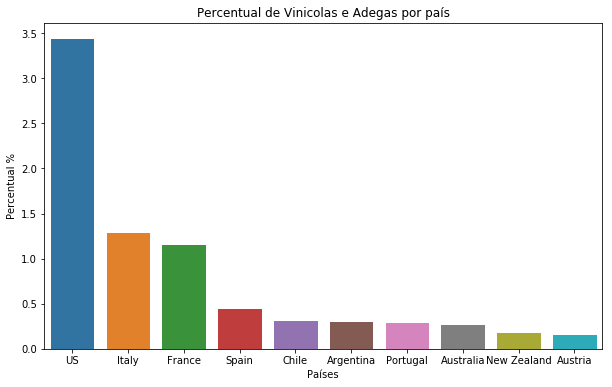

In [4]:
plt.figure(figsize=(10,6))
plt.title('Percentual de Vinicolas e Adegas por país')
plt.xlabel('Países')

#sns.plt.xlim(0,4)
sns.set_style('whitegrid')

#plot dos 10 primeiros países
sns.barplot(x=country_names[0:10], y=dataframe_statistical['Percentual %'][0:10])


In [5]:
#para demonstrar a diversidade de país

#adiciona indice para que seja possível o acesso à linha dos elementos
amount_countries = winemag_data.country.value_counts().index.to_list()

#pega os tres primeiros colocados em percentual
amount_countries_top_3_occurance = amount_countries[0:3]


#Esses seriam os paises que mais aparecem no dataset
amount_countries_top_3_occurance

['US', 'Italy', 'France']

Entendendo que, dada a maior ocorrência de vinhos de um determinado país em um Dataset, entende-se que estes seriam mais facilmente encontrados. Sendo assim, unindo as informações dos países com maior incidência no Dataset

In [6]:
#concatenar em um unico dataset os países com maior ocorrencia. Utilizou-se o metodo .loc para que os dados de cada um dos top3 fosse selecionado
concat_top_3_countries = pd.concat([winemag_data.loc[winemag_data.country == amount_countries_top_3_occurance[0]],winemag_data.loc[winemag_data.country == amount_countries_top_3_occurance[1]],winemag_data.loc[winemag_data.country == amount_countries_top_3_occurance[2]]])

#Faz um array com as medias dos 3 paises com maior ocorrencia
ocurrance_top3 = [winemag_data.loc[winemag_data.country == amount_countries_top_3_occurance[1]].points.mean(),winemag_data.loc[winemag_data.country == amount_countries_top_3_occurance[1]].points.mean(),winemag_data.loc[winemag_data.country == amount_countries_top_3_occurance[2]].points.mean()]
index_highest_mean = ocurrance_top3.index(max(ocurrance_top3))
#acessa o array de top3 ocorrencia de paises e retorna o que mais ocorre, baseado no indice de maior media
highest_mean_country = amount_countries_top_3_occurance[index_highest_mean]

#dados estatisticos do pais com maior media

#exibe todos os vinhos do pais com maior media
best_wine_country_list = concat_top_3_countries.loc[concat_top_3_countries.country == highest_mean_country]


concat_top_3_countries


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_price_ratio
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,0.408511
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,1.06667
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,1.47692
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,1.46154
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,1.58333
...,...,...,...,...,...,...,...,...,...,...,...,...
150921,150921,France,Shows some older notes: a bouquet of toasted w...,Blanc de Blancs Brut Mosaïque,91,38.0,Champagne,Champagne,NaN,Champagne Blend,Jacquart,2.39474
150923,150923,France,"Rich and toasty, with tiny bubbles. The bouque...",Demi-Sec,91,30.0,Champagne,Champagne,NaN,Champagne Blend,Jacquart,3.03333
150924,150924,France,"Really fine for a low-acid vintage, there's an...",Diamant Bleu,91,70.0,Champagne,Champagne,NaN,Champagne Blend,Heidsieck & Co Monopole,1.3
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain,3.37037


Essa é a lista de vinhos do país com a melhor média nas avaliações


In [7]:
best_wine_country_list.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_price_ratio
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,1.43939
13,13,France,This wine is in peak condition. The tannins an...,Château Montus Prestige,95,90.0,Southwest France,Madiran,NaN,Tannat,Vignobles Brumont,1.05556
18,18,France,Coming from a seven-acre vineyard named after ...,Le Pigeonnier,95,290.0,Southwest France,Cahors,NaN,Malbec,Château Lagrézette,0.327586
33,33,France,"Pale in color, this is nutty in character, wit...",Nonpareil Trésor Rosé Brut,90,22.0,France Other,Vin Mousseux,NaN,Sparkling Blend,Bouvet-Ladubay,4.09091
36,36,France,Gingery spice notes accent fresh pear and melo...,NaN,90,60.0,Rhône Valley,Châteauneuf-du-Pape,NaN,Rhône-style White Blend,Clos de L'Oratoire des Papes,1.5
44,44,France,"Dark in color and in flavor profile, this medi...",Coteaux,90,69.0,Rhône Valley,Cornas,NaN,Syrah,Tardieu-Laurent,1.30435
51,51,France,"This structured, complex Chardonnay is packed ...",NaN,90,68.0,Burgundy,Chassagne-Montrachet,NaN,Chardonnay,Chartron et Trébuchet,1.32353
52,52,France,"This ripe, full-bodied wine has ripe green fru...",Les 7 Hommes,90,42.0,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Cherrier Frères,2.14286
53,53,France,"With its light color and cool feel, this well-...",L'Inédit,90,28.0,Loire Valley,Coteaux du Giennois,NaN,Pinot Noir,Clement et Florian Berthier,3.21429
56,56,France,"Delicious while also young and textured, this ...",Le Pavé,90,NaN,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Domaine Vacheron,-


Se alguém deseja degustar vinhos com pontuação acima de 90 pontos abaixo de 20 dolares, eles são:

In [8]:
filtered_points_price = best_wine_country_list.loc[(best_wine_country_list.points > 90)&(best_wine_country_list.price<20)]
filtered_points_price

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_price_ratio
287,287,France,"Hugely tannic at this stage, this dense and co...",Cuvée Germain,91,16.0,Southwest France,Côtes du Tarn,NaN,Bordeaux-style Red Blend,Domaine D'en Ségur,5.6875
533,533,France,"This special selection, tight-cropped from 30 ...",NaN,92,18.0,Bordeaux,Blaye Côtes de Bordeaux,NaN,Bordeaux-style Red Blend,Château Marsau,5.11111
1571,1571,France,"The wine is intense, full in the mouth and ric...",Vieilles Vignes,91,14.0,Alsace,Alsace,NaN,Riesling,Domaine Jean Sipp,6.5
1869,1869,France,"This is ripe and smooth, with a generous cream...",Winzenberg Grand Cru,91,17.0,Alsace,Alsace,NaN,Riesling,Hubert Meyer,5.35294
1871,1871,France,"This is an impressive, big and broad wine. It'...",NaN,91,19.0,Bordeaux,Médoc,NaN,Bordeaux-style Red Blend,Château Pey de Pont,4.78947
...,...,...,...,...,...,...,...,...,...,...,...,...
144708,144708,France,"This is a great, concentrated wine, which pack...",NaN,91,17.0,Loire Valley,Montlouis-sur-Loire,NaN,Chenin Blanc,François Chidaine,5.35294
148381,148381,France,Masson-Blondelet has produced a sumptuous wine...,Villa Paulus,92,18.0,Loire Valley,Pouilly-Fumé,NaN,Sauvignon Blanc,Domaine Masson-Blondelet,5.11111
148394,148394,France,This is one of two terroir-based wines from Ma...,Les Angelots,91,18.0,Loire Valley,Pouilly-Fumé,NaN,Sauvignon Blanc,Domaine Masson-Blondelet,5.05556
148396,148396,France,"Almost New World in its intense fruit flavors,...",La Porte du Caillou,91,18.0,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Henri Bourgeois,5.05556


Províncias relacionadas a essa faixa de pontuação e preço são:

In [9]:
filtered_points_price_mod = filtered_points_price.province.value_counts().to_frame(name = 'total_in_dataframe').reset_index()
total = filtered_points_price_mod['total_in_dataframe'].sum()
filtered_points_price_mod

,index,total_in_dataframe
0,Southwest France,45
1,Bordeaux,31
2,Loire Valley,15
3,Provence,13
4,Alsace,10
5,Rhône Valley,9
6,Beaujolais,5
7,Languedoc-Roussillon,3
8,Burgundy,1
9,France Other,1


Plotando 

Text(0, 0.5, 'Provincias')

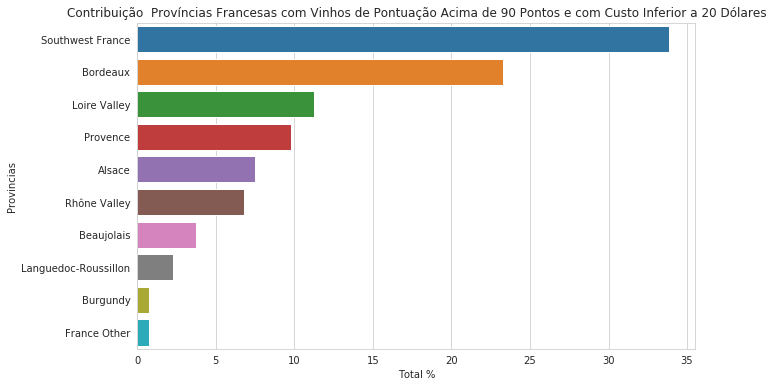

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x=(filtered_points_price_mod['total_in_dataframe']/total*100),y="index",data=filtered_points_price_mod)
plt.title('Contribuição  Províncias Francesas com Vinhos de Pontuação Acima de 90 Pontos e com Custo Inferior a 20 Dólares')
plt.xlabel('Total %')
plt.ylabel('Provincias')

A partir do plot acima, pode-se inferir que, da França, o país com maior número de Vinícolas presentes no dataset, os vinhos com pontuações acima de 90 pontos e custo inferior a 20 dólares são, majoritariamente, provenientes da região do Sul da França. Esse percentual, em relação às outras regiões, equivale a cerca de 35%. Em outras palavras, o sul da frança produz vinhos muito bem avaliados e acessíveis economicamente


Esse é o vinho com maior razão pontos/preço

In [11]:
#best_frech_wine_ratio = pd.to_numeric(best_wine_country_list['points_price_ratio'], errors='coerce')
#convertendo, primeiramente, a coluna points_price_ratio para o formato float
best_wine_country_list['points_price_ratio'] = best_wine_country_list['points_price_ratio'].apply(pd.to_numeric, downcast='float', errors='coerce')

#guardando as informacoes do vinho com maior razão de pontos/preço 
best_wine_pop_country = best_wine_country_list.loc[best_wine_country_list['points_price_ratio'].idxmax()]
best_wine_pop_country
#best_wine_country_list.iloc[best_wine_country_list.points_price_ratio.idxmax()].winery

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Unnamed: 0                                                       126568
country                                                          France
description           Smells a little warm with notes of stewed red ...
designation                                                         NaN
points                                                               83
price                                                                 5
province                                           Languedoc-Roussillon
region_1                                               Vin de Pays d'Oc
region_2                                                            NaN
variety                                                      Pinot Noir
winery                                                    French Rabbit
points_price_ratio                                                 16.6
Name: 126568, dtype: object

O vinho da 'French Rabitt' possui uma razão pontos-preço muito elevada. Apesar de não ter uma pontuação tão elevada, seu preço é bem baixo se comparado às outras opções do dataset

Sabendo que os vinhos Franceses tem uma maior ocorrência no Dataset, visando auxilar um Scatterplot, criou-se uma função que retorna 'Yes' ou 'No' para ser adicionada ao Dataset. 

In [12]:
def addFrechBoolValue(row):
    if row['country'] == 'France':
        return 'Yes'
    else:
        return 'No'

#adicionando uma coluna para ter a informação se o vinho é proveniente de um dos paises top3 mais avaliados e com maiores medias de pontos
winemag_data['is_French'] = winemag_data.apply(lambda row: addFrechBoolValue(row), axis=1)
winemag_data

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_price_ratio,is_French
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,0.408511,No
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,0.872727,No
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,1.06667,No
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,1.47692,No
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,1.43939,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio,4.55,No
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain,3.37037,Yes
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora,4.55,No
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset,1.73077,Yes


Fazendo um scatterplot para relacionar a quantidade de pontos obtida e o preço associado (de todo o dataset), bem como destacar os pontos relacionados ao fato do vinho ser francês ou não, tem-se

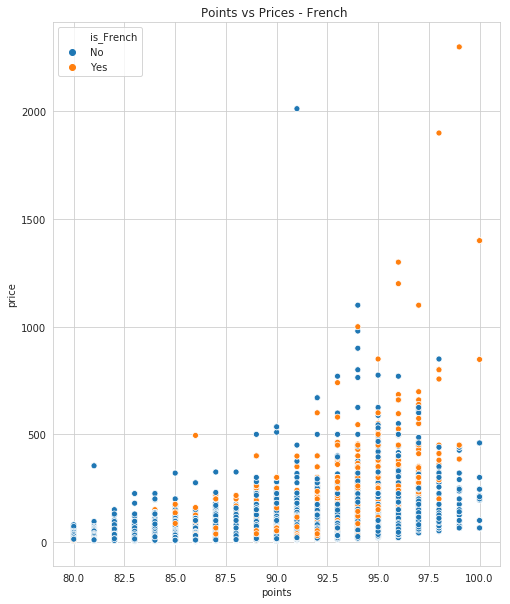

In [13]:
plt.figure(figsize=(8,10))
plt.title('Points vs Prices - French ')
sns.set_style('whitegrid')
sns.scatterplot(x=winemag_data['points'],y=winemag_data['price'],hue=winemag_data['is_French'])

O que pode-se observar com o plot acima é que a maior parte dos vinhos provenientes da França tem uma maior concentração de pontuações acima de 90 pontos. Além disso, observa-se que os vinhos com valores mais elevados também são franceses

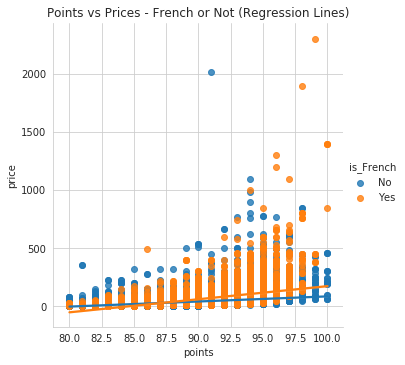

In [14]:

sns.lmplot(x="points", y="price", hue="is_French", data=winemag_data)

plt.title('Points vs Prices - French or Not (Regression Lines)')
sns.set_style('whitegrid')



Visando listar os vinhos com pontuação entre 87 e 90 pontos mais baratos, provenientes dos 3 países com maior ocorrência no dataset, tem-se:



In [15]:
a = concat_top_3_countries.loc[(concat_top_3_countries.points >= 87) & (concat_top_3_countries.points <=90)]
a = a.groupby('designation').price.mean().dropna().sort_values(ascending = True).to_frame(name='price').reset_index()
a
#sns.set_style('whitegrid')
#concat_top_3_countries.price[0]
#plt.figure(figsize=(20,10))
#sns.barplot(x=concat_top_3_countries['designation'][0:10], y=concat_top_3_countries.price[0:10])


#ordenar por maior preço e plotar

,designation,price
0,La Garrigue,7.0
1,Mátraalja,8.0
2,Frei Brothers Vineyards,8.0
3,Two Vines Vineyard 10 Red Wine,8.0
4,Two Vines,8.0
...,...,...
10706,Briccotto,250.0
10707,Fleur de Champagne Brut Rosé,300.0
10708,Clos de Vougeot,400.0
10709,Fleur de Champagne Blanc de Blancs Brut,400.0


Os vinhos (dos top3 ('US','Italy','France') de ocorrencia no dataset) com pontuação entre 87 e 90 pontos, e com menor custo, podem ser visualizados abaixo

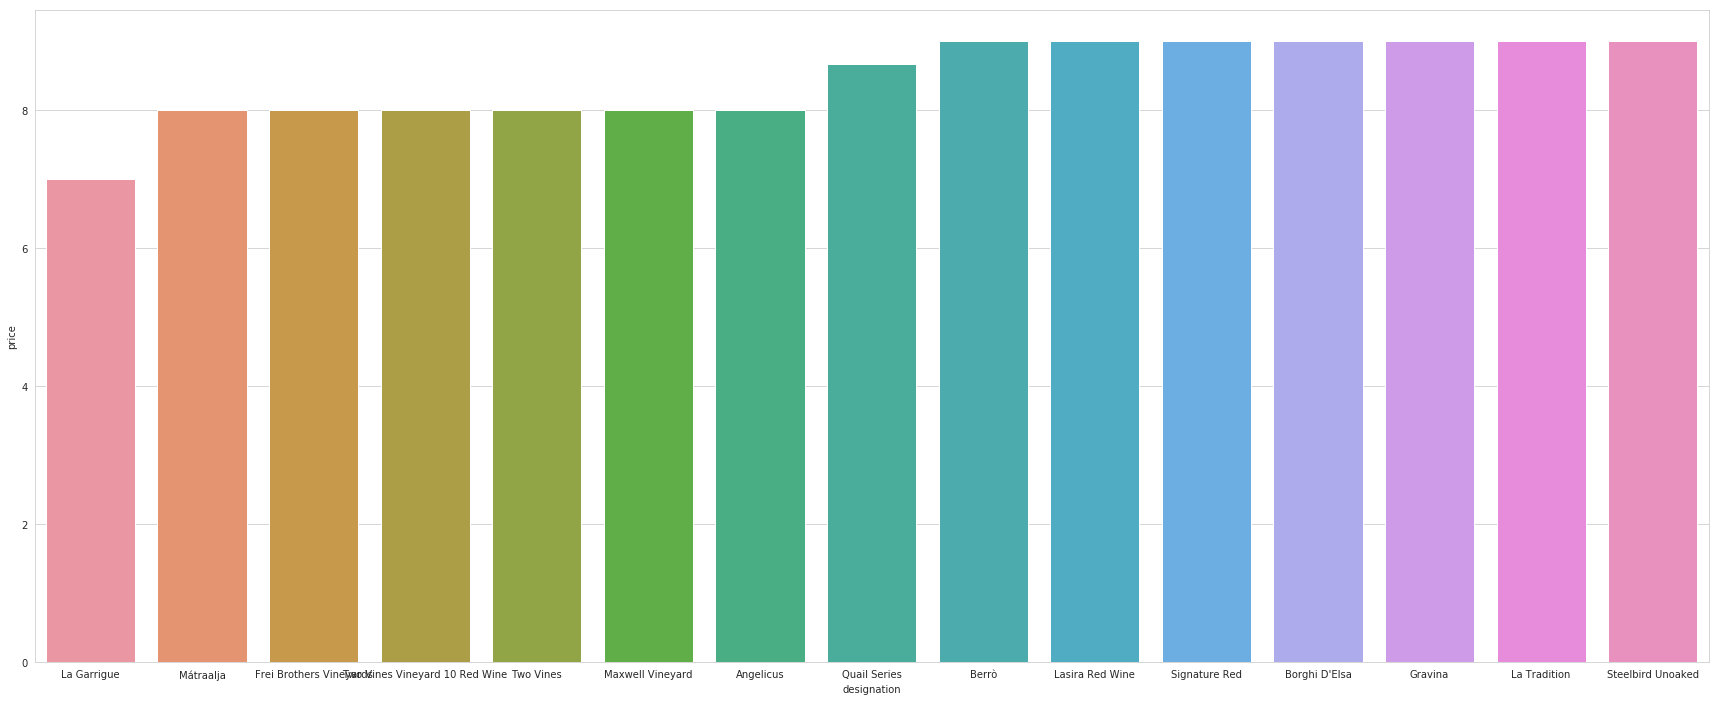

In [16]:

#o gráfico é tão largo assim para ser possível ler os labels
plt.figure(figsize=(30,12))
sns.barplot(x=a['designation'][0:15], y=a.price[0:15])


Fazendo agora uma análise estatística das variáveis de preço e pontuação po país

Text(0.5, 0, 'Pontos Médios')

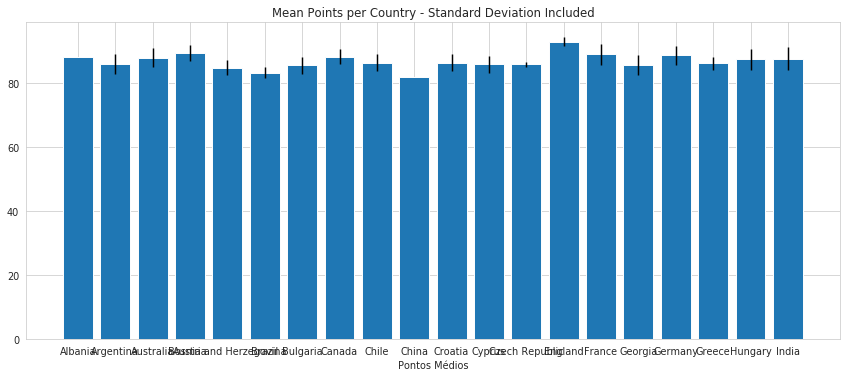

In [17]:
#Agrupa os dados por ['country','price','winery','variety'], ordena as medias de pontos e transforma a serie 
#statistical_analysis_mean_points = winemag_data.groupby(['country','price','winery','variety']).points.mean().sort_values(ascending = True).to_frame(name = 'mean_points').reset_index()
#statistical_analysis_mean_points

grouped_by_country_statistics = winemag_data.groupby('country').agg(['mean','std'])
grouped_by_country_statistics = grouped_by_country_statistics.dropna().round(2)
#MultiIndex([('Unnamed: 0', 'mean'),
#            ('Unnamed: 0',  'std'),
#            (    'points', 'mean'),
#            (    'points',  'std'),
#            (     'price', 'mean'),
#            (     'price',  'std')],


#salvando os valores das colunas do dataframe estatístico
points_by_country_mean = grouped_by_country_statistics[('points', 'mean')]
points_by_country_mean
points_by_country_std = grouped_by_country_statistics[('points', 'std')]
points_by_country_std
price_by_country_mean = grouped_by_country_statistics[('price', 'mean')]
price_by_country_std = grouped_by_country_statistics[('price', 'std')]
price_by_country_std

#transformando o objeto groupby para uma lista com index
grouped_by_country_statistics_titles = grouped_by_country_statistics.index.to_list()

sns.set_style('whitegrid')
plt.figure(figsize=(15, 6), dpi=70)
plt.bar(grouped_by_country_statistics_titles[0:20],points_by_country_mean[0:20],yerr = points_by_country_std[0:20])
plt.title('Mean Points per Country - Standard Deviation Included')
sns.set_style('whitegrid')
grouped_by_country_statistics.head(4)
#grouped_by_country_statistics
plt.xlabel('Países')
plt.xlabel('Pontos Médios')

In [18]:
val_std = points_by_country_std.max()
name_std_max = points_by_country_std.idxmax()
print('Desvio maximo de:', val_std, " no país: ",name_std_max)

Desvio maximo de: 3.66  no país:  India


O que pode-se observar é que as médias de pontuação dos países são bastante uniformes, variando, no máximo 3.66 pts na Índia

Agora o gráfico do preço médio com desvio padrão incluido

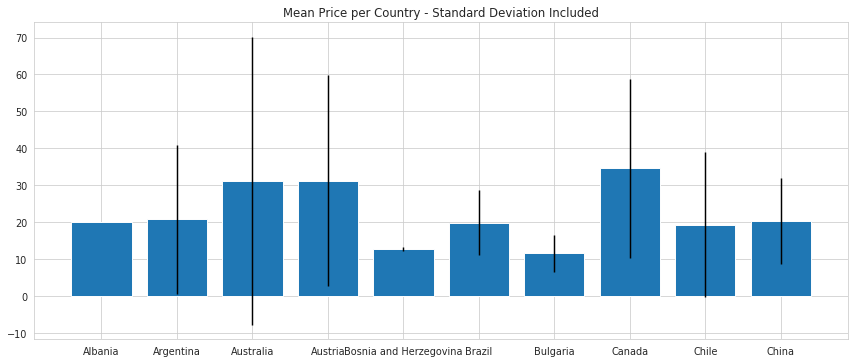

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 6), dpi=70)
plt.bar(grouped_by_country_statistics_titles[0:10],price_by_country_mean[0:10],yerr = price_by_country_std[0:10])
plt.title('Mean Price per Country - Standard Deviation Included')
sns.set_style('whitegrid')
#grouped_by_country_statistics
#grouped_by_country_statistics

In [20]:
idx_price_std_max = price_by_country_std.max()
name_std_max_price = price_by_country_std.idxmax()
print('Desvio maximo do preço de:', idx_price_std_max, " no país: ",name_std_max_price)

Desvio maximo do preço de: 69.7  no país:  France


Pode-se observar que alguns países tiveram um desvio padrão muito alto. Qual seriam os países com um desvio padrão de pontos entre 1.3 e 1.7 (Isso indica que, no geral, os vinhos destoam pouco quanto a pontuação entre si), e qual a colocação deles no ranking de pontos médios?

In [21]:
amount_countries
#grouped_by_country_statistics
grouped_by_country_statistics_sorted_points = grouped_by_country_statistics.sort_values(by=[('points', 'mean')],ascending = False)
grouped_by_country_statistics_sorted_points
countries_low_std = grouped_by_country_statistics_sorted_points.loc[(grouped_by_country_statistics_sorted_points[('points', 'std')] >=1.3) & (grouped_by_country_statistics_sorted_points[('points', 'std')] <=1.7)]
countries_low_std
#grouped_countries.assign(dp=grouped_by_country_statistics[('points', 'std')])
#countries_low_std = grouped_by_country_statistics.loc[(grouped_by_country_statistics['Std'] >= 1.3) & (grouped_by_country_statistics['Std'] <= 1.7)]
#countries_low_std = countries_low_std['country'].reset_index()
#grouped_by_country_statistics
#a.c1[a.c1 == 8].index.tolist()

Unnamed: 0           points        price       
              mean       std   mean   std   mean    std
country                                                
England   29927.33   1409.98  92.89  1.36  47.50  11.96
Turkey    22022.31  20760.67  88.10  1.58  25.80  19.12
Brazil    82272.80  33433.47  83.24  1.67  19.92   8.84

In [22]:
max_mean_price = grouped_by_country_statistics[('price','mean')].max()
print(max_mean_price)

47.5


A partir disto, pode-se observar que o país que tem um menor desvio padrão de pontos é a Inglaterra, com 1.36. A média de avaliação dos vinhos provenientes de lá chega a 92.89 pts, com um preço médio de $47.5. No entanto, apesar da pequena variação da pontuação, a Inglaterra possui a maior média de preços por país do DataSet inteiro